## Basic Linear Regression

## 1. Create dataset

In [1]:
import os 

def mkdir_if_not_exist(path):
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [2]:
import numpy as np

data_file = '../data/LR1.csv'
mkdir_if_not_exist('../data')

x = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
y = np.array([49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

with open (data_file, 'w') as f:
    f.write('Height, Weight\n')
    for i in range(x.size):
        str0 = '{},{}\n'.format(x[i], y[i])
        f.write(str0)

## 2. Read dataset

In [3]:
import pandas as pd

data_file = '../data/LR1.csv'
data = pd.read_csv(data_file)
inputs ,outputs = data.iloc[:, 0:1], data.iloc[:, -1]
X, y= np.array(inputs.values), np.array(outputs.values)
data 

,Height,Weight
0,147,49
1,150,50
2,153,51
3,158,54
4,163,58
5,165,59
6,168,60
7,170,62
8,173,63
9,175,64


[]

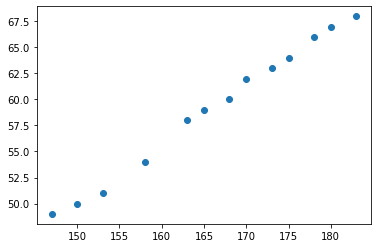

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot()

## 3. Caculate Linear Regression

**Bias trick**

In [5]:
Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

**w = pinv(XbarT.Xbar)x(Xbar.y)**

In [6]:
A = np.linalg.pinv(np.dot(Xbar.T, Xbar))
B = np.dot(Xbar.T, y)
A, B

(array([[ 1.69874542e+01, -1.01635185e-01],
        [-1.01635185e-01,  6.10844845e-04]]),
 array([   771., 129198.]))

In [7]:
w = np.dot(A, B)
w

array([-33.73541021,   0.55920496])

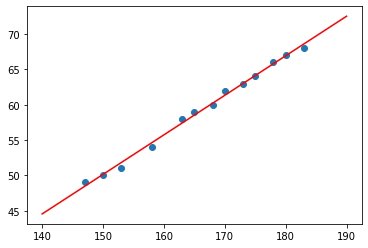

In [8]:
x0 = np.linspace(140, 190, 20)
y0 = w[1]*x0 + w[0]
plt.scatter(X, y)
plt.plot(x0, y0, 'r-')
plt.show()

## 4. Predict

In [9]:
y1 = w[1]*155 + w[0] #predict weight for a person with 155cm height
y2 = w[1]*160 + w[0] #predict weight for a person with 160cm height
y1, y2

(52.9413588948063, 55.73738370451929)

## 5. LR with Scikit-learn

In [10]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

regr.intercept_, regr.coef_[0]

(-33.73541020580774, 0.5592049619396674)